In [2]:
# IMDB 데이터셋 로드
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/mingggkeee/miniforge3/envs/mingggkeee/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/mingggkeee/miniforge3/envs/mingggkeee/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays

In [3]:
# 정수 시퀀스를 이진 행렬로 인코딩하기
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
# 모델 정의하기
from keras import models
from keras import layers 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
# 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
# 옵티마이저 설정
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
# 손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [8]:
# 검증 세트 준비하기
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
# 모델 훈련
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5758 - acc: 0.7188 - val_loss: 0.3838 - val_acc: 0.8585
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3071 - acc: 0.9012 - val_loss: 0.3011 - val_acc: 0.8833
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2158 - acc: 0.9328 - val_loss: 0.2763 - val_acc: 0.8900
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1684 - acc: 0.9439 - val_loss: 0.3149 - val_acc: 0.8738
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1398 - acc: 0.9567 - val_loss: 0.2848 - val_acc: 0.8867
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1101 - acc: 0.9658 - val_loss: 0.2998 - val_acc: 0.8849
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0890 - acc: 0.9756 - val_loss: 0.3247 - val_acc: 0.8836
Epoch 8/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0753 - ac

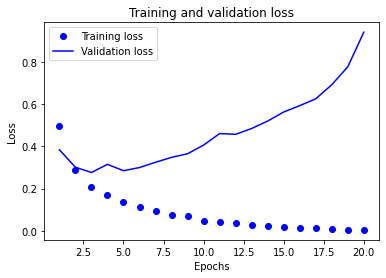

In [10]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt 

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

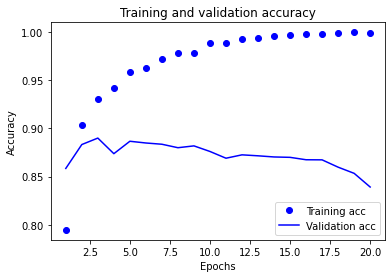

In [11]:
# 훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
# 모델을 처음부터 다시 훈련
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.5488 - accuracy: 0.7385
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2671 - accuracy: 0.9108
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1945 - accuracy: 0.9355
Epoch 4/4
782/782 [==============================] - 1s 828us/step - loss: 0.3182 - accuracy: 0.8748


In [13]:
results

[0.318246066570282, 0.8748400211334229]

In [14]:
print(model.predict(X_test))